In [1]:
import pandas as pd
import os
def process_csv_folder(folder_path):
    # Initialize an empty list to store DataFrames
    dfs = []

    # List all CSV files in the specified folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    # print(csv_files)

    for csv_file in csv_files:
        # Extract relevant information from the filename
        filename = os.path.splitext(csv_file)[0]
        parts = filename.split('_')

        pop_size = int(parts[4])
        tournament_size = int(parts[7])
        iterations = int(parts[9])
        crossover_type = parts[12]
        mutation_type = parts[15]
        mutation_point = parts[17]
        mutation = parts[19]


        time_taken=parts[-1]

        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(folder_path, csv_file))

        # Create a 'pop_size', 'tournament size', 'iterations', and 'crossover_type' column
        df['pop_size'] = pop_size
        df['tournament_size'] = tournament_size
        df['iterations'] = iterations
        df['crossover_type'] = crossover_type
        df['mutation_type'] = mutation_type
        df['mutation_point'] = mutation_point
        df['mutation'] = mutation
        df['time_taken']=time_taken

        # Append the DataFrame to the list
        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)

    return result_df


In [2]:
folder_path = '/Users/devarshigoswami/Desktop/work/nature_inspired_computation/CourseWork/output_csv_brazil/'
result_df = process_csv_folder(folder_path)

# Now you have a single DataFrame with the desired columns


In [16]:
result_df.iterations.unique()

array([10000, 30000, 20000])

In [18]:
result_df[result_df.iterations==10000].MinCost.min()

28218.0

In [22]:
result_df=result_df[result_df.iterations==10000]

In [4]:
import matplotlib.pyplot as plt

def plot_convergence(df, fixed_params, variable_param):
    """
    Plot convergence with one parameter varying while others are fixed.

    Parameters:
    - df: DataFrame containing the data
    - fixed_params: Dictionary of fixed parameters and their values
    - variable_param: Name of the parameter to vary

    Example:
    fixed_params = {'pop_size': 50, 'iterations': 10000, 'crossover_type': 'fix'}
    plot_convergence(final, fixed_params, 'tournament_size')
    """
    # Initialize the filter condition
    filter_condition = [True] * len(df)

    # Add conditions for fixed parameters
    for param, value in fixed_params.items():
        filter_condition &= (df[param] == value)

    # Add condition for the variable parameter
    filter_condition &= df[variable_param].notna()

    # Get unique values for the varying parameter
    varying_values = df[filter_condition][variable_param].unique()

    # Plot each line for varying parameter
    for value in varying_values:
        subset_condition = filter_condition & (df[variable_param] == value)
        data_subset = df[subset_condition]
        plt.plot(data_subset['Iteration'], data_subset['MinCost'], label=f'{variable_param} = {value}')

    # Add fixed parameters to the title
    title = f'Convergence Plot with Varying {variable_param}\nFixed Parameters: {", ".join([f"{key}={value}" for key, value in fixed_params.items()])}'
    plt.title(title)

    # Set labels and legend
    plt.xlabel('Iterations')
    plt.ylabel('MinCost')
    plt.legend()

    # Save the figure to the Documents folder
    plt.savefig(f'convergence_plot_{variable_param}.png')

    # Display the plot
    plt.show()

/var/folders/3f/36v601bj4y94zm28kdbvx9br0000gn/T/ipykernel_92546/3313460317.py:21: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  filter_condition &= (df[param] == value)


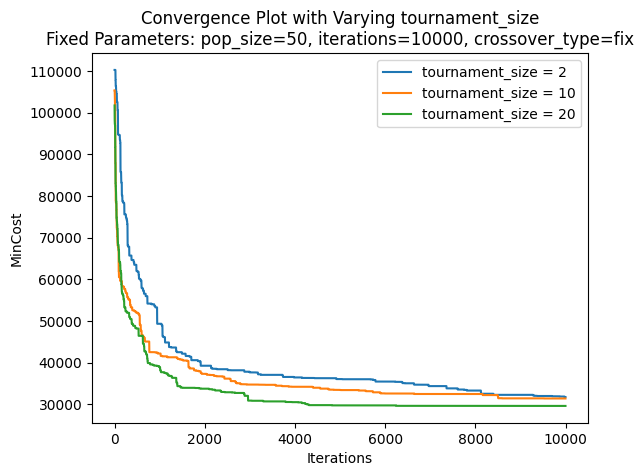

In [49]:
# Example usage:
fixed_params = {'pop_size': 50, 'iterations': 10000, 'crossover_type': 'fix'}
plot_convergence(final, fixed_params, 'tournament_size')


/var/folders/3f/36v601bj4y94zm28kdbvx9br0000gn/T/ipykernel_92546/3313460317.py:21: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  filter_condition &= (df[param] == value)


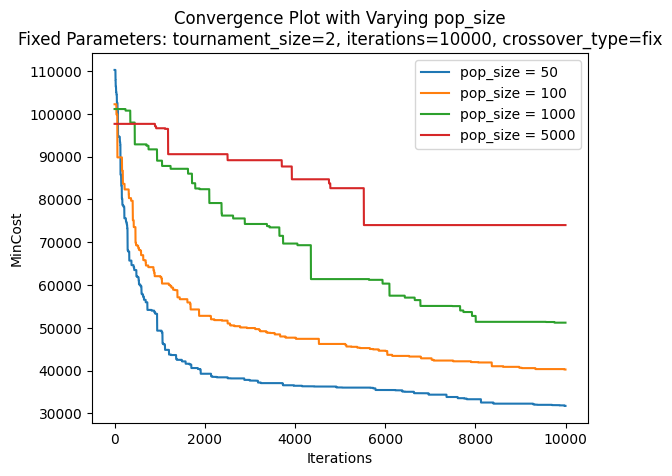

In [50]:
# Example usage:
fixed_params = {'tournament_size': 2, 'iterations': 10000, 'crossover_type': 'fix'}
plot_convergence(final, fixed_params, 'pop_size')


/var/folders/3f/36v601bj4y94zm28kdbvx9br0000gn/T/ipykernel_92546/3313460317.py:21: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  filter_condition &= (df[param] == value)


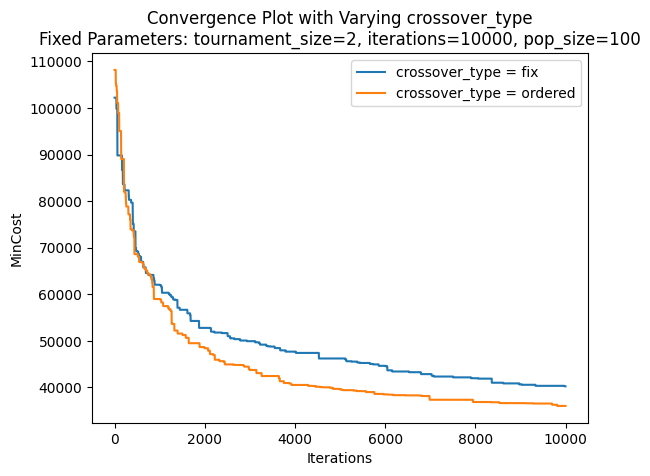

In [51]:
# Example usage:
fixed_params = {'tournament_size': 2, 'iterations': 10000, 'pop_size': 100}
plot_convergence(final, fixed_params, 'crossover_type')


/var/folders/3f/36v601bj4y94zm28kdbvx9br0000gn/T/ipykernel_2554/3313460317.py:21: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  filter_condition &= (df[param] == value)


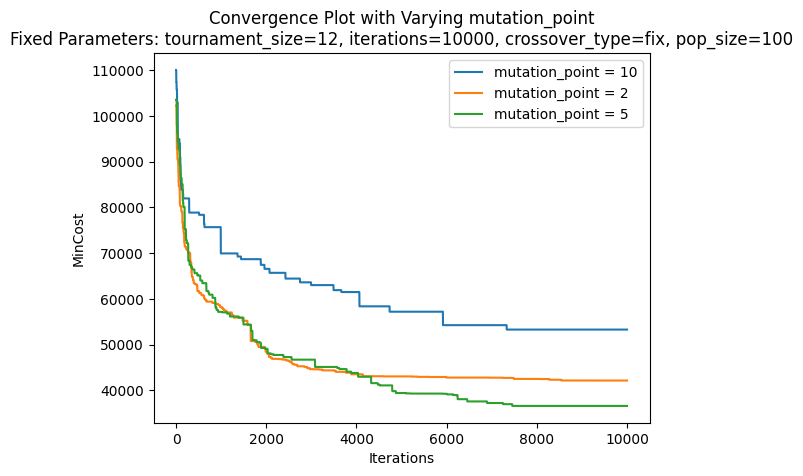

In [6]:
# Example usage:
fixed_params = {'tournament_size': 12, 'iterations': 10000, 'crossover_type': 'fix', 'pop_size': 100}
plot_convergence(result_df, fixed_params, 'mutation_point')


## BURMA

In [71]:
folder_path_burma = '/Users/devarshigoswami/Desktop/work/nature_inspired_computation/CourseWork/output_csv_burma/'
burma = process_csv_folder(folder_path_burma)

# Now you have a single DataFrame with the desired columns


/var/folders/3f/36v601bj4y94zm28kdbvx9br0000gn/T/ipykernel_92546/3709574220.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat(dfs, ignore_index=True)


In [72]:
burma.shape


(2160000, 9)

In [61]:
burma.pop_size.unique()

array([100])

In [74]:
burma=burma[burma.iterations==10000]

In [76]:
burma.groupby(['pop_size','tournament_size','iterations','crossover_type']).agg({'MinCost':'min'})

MinCost
pop_size tournament_size iterations crossover_type         
50       2               10000      fix              4528.0
                                    ordered          4499.0
         10              10000      fix              4629.0
                                    ordered          5159.0
         20              10000      fix              4806.0
                                    ordered          5252.0
100      2               10000      fix              4071.0
                                    ordered          4141.0
         10              10000      fix              4582.0
                                    ordered          4661.0
         20              10000      fix              3870.0
                                    ordered          4762.0
         100             10000      fix              5013.0
                                    ordered          4810.0
1000     2               10000      fix              3448.0
                                    ordered          3631.0
         10              10000      fix              3892.0
                                    ordered          4078.0
         20              10000      fix              3718.0
                                    ordered          4090.0
         100             10000      fix              4143.0
                                    ordered          4174.0
         1000            10000      fix              4475.0
                                    ordered          3883.0
5000     2               10000      fix              3484.0
                                    ordered          3543.0
         10              10000      fix              3323.0
                                    ordered          3346.0
         20              10000      fix              3323.0
                                    ordered          3453.0
         100             10000      fix              3896.0
                                    ordered          3599.0
         1000            10000      fix              4275.0
                                    ordered          3857.0
10000    2               10000      fix              3827.0
                                    ordered          3655.0

In [1]:
burma.MinCost.min()

NameError: name 'burma' is not defined

In [82]:
burma.MinCost.min()

3323.0

In [6]:
brazil_mut

,Iteration,MinCost,AvgCost,StdDevCost,pop_size,tournament_size,iterations,crossover_type,mutation_type,mutation_point,mutation,time_taken
0,0,110005.0,124042.11,6097.990021,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
1,1,110005.0,123308.83,5688.572930,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
2,2,110005.0,122570.31,5527.005479,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
3,3,107350.0,121785.85,5662.656328,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
4,4,107350.0,121118.06,5506.998718,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9995,36614.0,37513.54,2087.441876,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875
59996,9996,36614.0,37472.84,1684.063962,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875
59997,9997,36614.0,37328.11,331.477314,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875
59998,9998,36614.0,37329.07,337.873123,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875


In [9]:
brazil_mut = process_csv_folder(folder_path)
brazil_mut.groupby(['pop_size','tournament_size','iterations','crossover_type','mutation_type',
       'mutation_point', 'mutation', ]).agg({'Iteration':'count','MinCost':'min'})
# Now you have a single DataFrame with the desired columns


Iteration  \
pop_size tournament_size iterations crossover_type mutation_type mutation_point mutation              
100      12              10000      fix            multi         10             False         10000   
                                                                                True          10000   
                                                                 2              False         10000   
                                                                                True          10000   
                                                                 5              False         10000   
                                                                                True          10000   

                                                                                           MinCost  
pop_size tournament_size iterations crossover_type mutation_type mutation_point mutation            
100      12              10000      fix            multi         10             False      97910.0  
                                                                                True       53289.0  
                                                                 2              False      98457.0  
                                                                                True       42159.0  
                                                                 5              False     101317.0  
                                                                                True       36614.0

In [19]:
brazil_mut

,Iteration,MinCost,AvgCost,StdDevCost,pop_size,tournament_size,iterations,crossover_type,mutation_type,mutation_point,mutation,time_taken
0,0,110005.0,124042.11,6097.990021,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
1,1,110005.0,123308.83,5688.572930,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
2,2,110005.0,122570.31,5527.005479,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
3,3,107350.0,121785.85,5662.656328,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
4,4,107350.0,121118.06,5506.998718,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9995,36614.0,37513.54,2087.441876,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875
59996,9996,36614.0,37472.84,1684.063962,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875
59997,9997,36614.0,37328.11,331.477314,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875
59998,9998,36614.0,37329.07,337.873123,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875


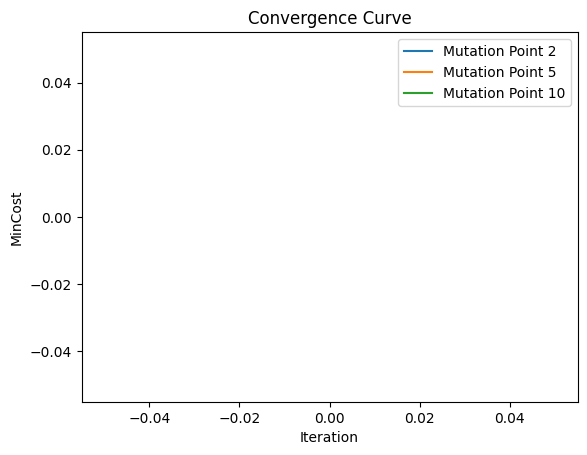

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# Filter the dataframe based on the specified conditions
filtered_df = brazil_mut[(brazil_mut['tournament_size'] == 12) & 
                  (brazil_mut['iterations'] == 10000) & 
                  (brazil_mut['crossover_type'] == 'fix') & 
                  (brazil_mut['pop_size'] == 10000)]

# Convert 'MinCost' and 'Iteration' to numeric type
filtered_df['MinCost'] = pd.to_numeric(filtered_df['MinCost'])
filtered_df['Iteration'] = pd.to_numeric(filtered_df['Iteration'])

# Create a figure and axis
fig, ax = plt.subplots()

# Filter the dataframe based on mutation_point values
for mutation_point in [2, 5, 10]:
    mutation_df = filtered_df[filtered_df['mutation_point'] == mutation_point]
    
    # Plot MinCost vs Iteration for each mutation_point
    ax.plot(mutation_df['Iteration'], mutation_df['MinCost'], label=f'Mutation Point {mutation_point}')

# Set labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('MinCost')
ax.set_title('Convergence Curve')
ax.legend()  # Add legend

# Show the plot
plt.show()


In [37]:
brazil_mut.dtypes

Iteration            int64
MinCost            float64
AvgCost            float64
StdDevCost         float64
pop_size             int64
tournament_size      int64
iterations           int64
crossover_type      object
mutation_type       object
mutation_point      object
mutation            object
time_taken          object
dtype: object

In [38]:
brazil_mut[(brazil_mut['tournament_size'] == 12) & 
                  (brazil_mut['iterations'] == 10000) & 
                  (brazil_mut['crossover_type'] == 'fix') & .grou
                  (brazil_mut['pop_size'] == 100) & (brazil_mut['mutation_point']=='10')]

,Iteration,MinCost,AvgCost,StdDevCost,pop_size,tournament_size,iterations,crossover_type,mutation_type,mutation_point,mutation,time_taken
0,0,110005.0,124042.11,6097.990021,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
1,1,110005.0,123308.83,5688.572930,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
2,2,110005.0,122570.31,5527.005479,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
3,3,107350.0,121785.85,5662.656328,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
4,4,107350.0,121118.06,5506.998718,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,9995,97910.0,97910.00,0.000000,100,12,10000,fix,multi,10,False,taken-0.0010020732879638672
29996,9996,97910.0,97910.00,0.000000,100,12,10000,fix,multi,10,False,taken-0.0010020732879638672
29997,9997,97910.0,97910.00,0.000000,100,12,10000,fix,multi,10,False,taken-0.0010020732879638672
29998,9998,97910.0,97910.00,0.000000,100,12,10000,fix,multi,10,False,taken-0.0010020732879638672


In [24]:
brazil_mut

,Iteration,MinCost,AvgCost,StdDevCost,pop_size,tournament_size,iterations,crossover_type,mutation_type,mutation_point,mutation,time_taken
0,0,110005.0,124042.11,6097.990021,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
1,1,110005.0,123308.83,5688.572930,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
2,2,110005.0,122570.31,5527.005479,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
3,3,107350.0,121785.85,5662.656328,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
4,4,107350.0,121118.06,5506.998718,100,12,10000,fix,multi,10,True,taken-0.001293182373046875
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9995,36614.0,37513.54,2087.441876,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875
59996,9996,36614.0,37472.84,1684.063962,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875
59997,9997,36614.0,37328.11,331.477314,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875
59998,9998,36614.0,37329.07,337.873123,100,12,10000,fix,multi,5,True,taken-0.0012340545654296875


In [94]:
result_df[result_df.StdDevCost==20779.94226093961]

,Iteration,MinCost,AvgCost,StdDevCost,pop_size,tournament_size,iterations,crossover_type,time_taken
1260158,158,60370.0,92341.372,20779.942261,1000,1000,10000,ordered,taken-0.004663944244384766


In [98]:
result_df[result_df.StdDevCost==0].groupby(['pop_size','tournament_size','iterations','crossover_type']).agg({'Iteration':'count','MinCost':'min'})

Iteration   MinCost
pop_size tournament_size iterations crossover_type                     
50       2               10000      fix                117079   85953.0
                                    ordered            107507   84986.0
         10              10000      fix                119567   96915.0
                                    ordered            119545   92975.0
         20              10000      fix                119651   92136.0
                                    ordered            119676   34132.0
100      2               10000      fix                 37647   79201.0
                                    ordered             37648   69098.0
         10              10000      fix                 39584   92080.0
                                    ordered             39523   88730.0
         20              10000      fix                 39732   97546.0
                                    ordered             39722   97383.0
         100             10000      fix                 39804  104175.0
                                    ordered             39804  103585.0
1000     10              10000      fix                 31751   66236.0
                                    ordered             31446   73147.0
         20              10000      fix                 35076   72388.0
                                    ordered             36089   77632.0
         100             10000      fix                 37751   92224.0
                                    ordered             37789   88873.0
         1000            10000      fix                 38004   94245.0
                                    ordered             38004   99054.0
5000     20              10000      fix                  5803   60653.0
                                    ordered              3686   58552.0

/var/folders/3f/36v601bj4y94zm28kdbvx9br0000gn/T/ipykernel_1249/1797665459.py:21: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  filter_condition &= (df[param] == value)


['10' '2' '5']


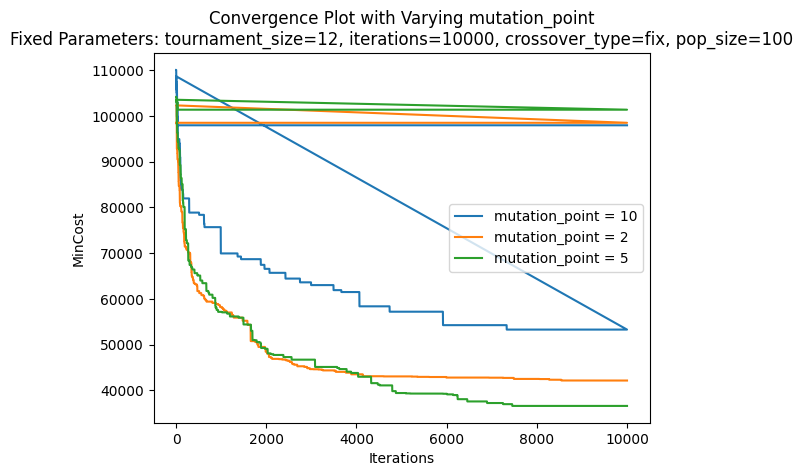

In [31]:
import matplotlib.pyplot as plt

def plot_convergence(df, fixed_params, varying_param):
    """
    Plot convergence with one parameter varying while others are fixed.

    Parameters:
    - df: DataFrame containing the data
    - fixed_params: Dictionary of fixed parameters and their values
    - varying_param: Name of the parameter to vary

    Example:
    fixed_params = {'tournament_size': 12, 'iterations': 10000, 'crossover_type': 'fix', 'pop_size': 10000}
    plot_convergence(brazil_mut, fixed_params, 'mutation_point')
    """
    # Initialize the filter condition
    filter_condition = [True] * len(df)

    # Add conditions for fixed parameters
    for param, value in fixed_params.items():
        filter_condition &= (df[param] == value)

    # Add condition for the varying parameter
    filter_condition &= df[varying_param].notna()

    # Get unique values for the varying parameter
    varying_values = df[filter_condition][varying_param].unique()
    print(varying_values)
    # Plot each line for varying parameter
    for value in varying_values:
        subset_condition = filter_condition & (df[varying_param] == value)
        data_subset = df[subset_condition]
        plt.plot(data_subset['Iteration'], data_subset['MinCost'], label=f'{varying_param} = {value}')

    # Add fixed parameters to the title
    title = f'Convergence Plot with Varying {varying_param}\nFixed Parameters: {", ".join([f"{key}={value}" for key, value in fixed_params.items()])}'

    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('MinCost')
    plt.legend()
    plt.show()

# Example usage:
fixed_params = {'tournament_size': 12, 'iterations': 10000, 'crossover_type': 'fix', 'pop_size': 100}
plot_convergence(brazil_mut, fixed_params, 'mutation_point')


In [ ]:
brazil_mut

In [ ]:
df[df.]